In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from random import randint
from sklearn.preprocessing import StandardScaler

# Hапишіть функцію гіпотези лінійної регресії у векторному вигляді

In [2]:
def linear_regresion(x, w0=0, w1=0):
    return w0 + w1 * x

Використання функції гіпотези лінійної регресії у векторному вигляді

In [3]:
input_data = np.array([2, 3, 4, 5])

output_data = input_data * 3 + 2

h_res = linear_regresion(input_data)
h_res

array([0, 0, 0, 0])

# Cтворіть функцію для обчислення функції втрат у векторному вигляді


In [4]:
def mse(predicted_results, true_results, w0=0, w1=0):
    return 1 / (2 * len(predicted_results)) * np.sum((linear_regresion(predicted_results, w0, w1) - true_results) ** 2)

Використання функції для обчислення функції втрат у векторному вигляді

In [5]:
mse(input_data, output_data)

83.75

# Pеалізуйте один крок градієнтного спуску


In [6]:
def grad_descent(input_data_, output_data_, iter=1000, lr=0.01, stopping_value=0.0001):
    w0 = 0
    w1 = 0
    n = len(input_data_)
    last_mse_result = None

    for _ in range(iter):
        linear_regresion_result = linear_regresion(input_data_, w0, w1)
        mse_result = mse(linear_regresion_result, output_data_, w0, w1)

        if last_mse_result and abs(mse_result - last_mse_result) <= stopping_value:
            break

        last_mse_result = mse_result

        intercept_derivative = -(1/n) * np.sum(input_data_ * (output_data_ - linear_regresion_result))
        slope_derivative = -(1/n) * np.sum(output_data_ - linear_regresion_result)

        w0 -= slope_derivative * lr
        w1 -= intercept_derivative * lr

    return w0, w1

In [7]:
w0, w1 = grad_descent(input_data, output_data)

In [8]:
print(linear_regresion(input_data, w0, w1).round())
print(output_data.round())

[ 8. 11. 14. 17.]
[ 8 11 14 17]


# 3найдіть найкращі параметри w для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [9]:
import pandas as pd

df = pd.read_csv('Housing.csv')[['price', 'area', 'bedrooms', 'bathrooms']]

h_input_data = df[['area', 'bedrooms', 'bathrooms']].values
h_input_data = StandardScaler().fit(h_input_data).transform(h_input_data)

h_output_data = df[['price']].values.reshape(-1)


In [10]:
def multiple_linear_regresion(input_data_, weights):
    return weights[0] + np.dot(input_data_, weights[1:])

def multiple_mse(predicted_results, true_results):
    return 1 / (2 * len(true_results)) * np.sum((predicted_results - true_results) ** 2) 

In [11]:
def gradient_descent_multiple(input_data_, output_data_, iter=1000, lr=0.1, stopping_value=0.01):
    weights = np.ones(input_data_.shape[1] + 1)
    n = len(input_data_)
    last_mse_result = None

    for _ in range(iter):
        multiple_linear_regresion_result = multiple_linear_regresion(input_data_, weights)
        multiple_mse_result = multiple_mse(multiple_linear_regresion_result, output_data_)
        
        if last_mse_result and (abs(multiple_mse_result - last_mse_result) <= stopping_value):
            break

        last_mse_result = multiple_mse_result

        weights[0] -= lr * (1/n) * np.sum(multiple_linear_regresion_result - output_data_)

        random_index = randint(0, len(weights[1:]) - 1)
        last_weights = (1/n) * np.sum((multiple_linear_regresion_result - output_data_) * input_data_[:, random_index])
        weights[random_index + 1] -= lr * last_weights

    return weights

model_result = multiple_linear_regresion(h_input_data, gradient_descent_multiple(h_input_data, h_output_data))

In [12]:
model = LinearRegression()
model.fit(h_input_data, h_output_data)
model_result_lib = model.predict(h_input_data)

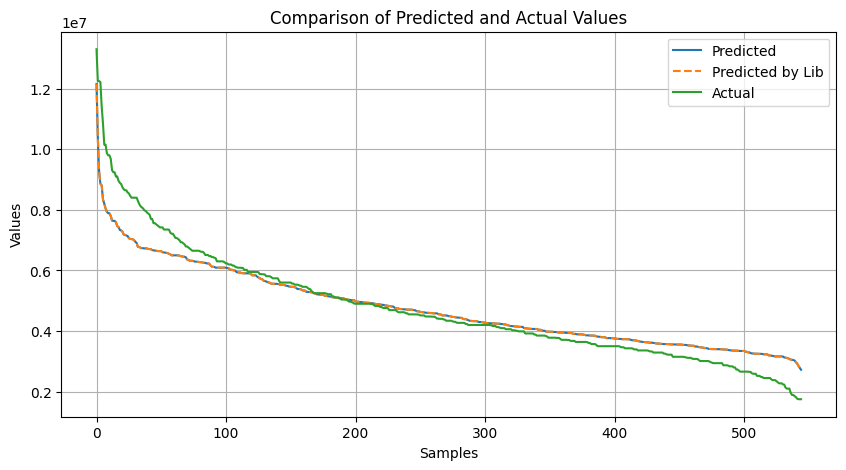

In [13]:
import matplotlib.pyplot as plt

predicted_values = model_result

actual_values = h_output_data

plt.figure(figsize=(10, 5))
plt.plot(np.sort(predicted_values)[::-1], label='Predicted')
plt.plot(np.sort(model_result_lib)[::-1], label='Predicted by Lib', linestyle='--')
plt.plot(actual_values, label='Actual')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# 3найдіть ці ж параметри за допомогою аналітичного рішення

In [14]:
h_input_data_with_ones = np.hstack([np.ones((h_input_data.shape[0], 1)), h_input_data])
theta = np.linalg.inv(h_input_data_with_ones.T @ h_input_data_with_ones) @ h_input_data_with_ones.T @ h_output_data

theta

array([4766729.24770642,  821214.14349518,  299983.57107963,
        695808.52272538])

# Для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати

In [15]:
model.coef_, model.intercept_

(array([821214.14349519, 299983.57107963, 695808.52272537]), 4766729.247706422)